Team Members:

Lopez Tzec Isaias de Jesus

Murguia Ortiz Joaquin

Sandoval Cambranis Krishna

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
image = Image.open('/content/179254-arte_de_guitarra_kazuha-impacto_genshin-arte-kaedehara_kazuha-fan_art-3840x2160.jpg')


In [ ]:
gray_image = image.convert("L")

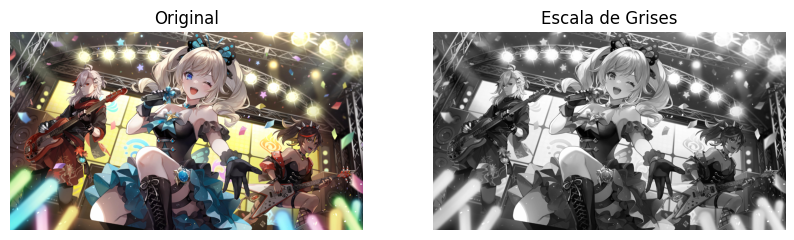

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap="gray")
plt.title("Escala de Grises")
plt.axis("off")

plt.show()

In [ ]:
# Convertir a lista de listas
width, height = gray_image.size
image_list = []
for y in range(height):
    row = []
    for x in range(width):
        row.append(gray_image.getpixel((x, y)))  # Obtener valor del píxel (0-255)
    image_list.append(row)

Funcion con Python con filtro Gaussiano

In [ ]:
def sobel_pure_python(image):
    height = len(image)
    width = len(image[0])
    output = [[0] * width for _ in range(height)]

    # Añadir padding reflejado
    padded = [row[:] for row in image]
    padded.insert(0, padded[0].copy())
    padded.append(padded[-1].copy())
    for row in padded:
        row.insert(0, row[0])
        row.append(row[-1])

    # Kernel Sobel para bordes horizontales y verticales
    kernel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    kernel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

    for i in range(height):
        for j in range(width):
            sum_x = 0
            sum_y = 0
            for ki in range(3):
                for kj in range(3):
                    sum_x += padded[i + ki][j + kj] * kernel_x[ki][kj]
                    sum_y += padded[i + ki][j + kj] * kernel_y[ki][kj]

            # Magnitud del gradiente
            gradient = min(255, int(abs(sum_x) + abs(sum_y)))
            output[i][j] = gradient

    return output

Edge Detection

In [ ]:
def gaussian_pure_python(image):
    height = len(image)
    width = len(image[0])
    output = [[0] * width for _ in range(height)]
    kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]

    # Añadir padding reflejado
    padded = [row[:] for row in image]
    padded.insert(0, padded[0].copy())  # Añadir fila superior
    padded.append(padded[-1].copy())    # Añadir fila inferior
    for row in padded:
        row.insert(0, row[0])  # Añadir columna izquierda
        row.append(row[-1])    # Añadir columna derecha

    # Aplicar kernel
    for i in range(height):
        for j in range(width):
            sum_val = 0
            for ki in range(3):
                for kj in range(3):
                    sum_val += padded[i + ki][j + kj] * kernel[ki][kj]
            output[i][j] = sum_val // 16  # Normalizar

    return output

Noise reduction

In [ ]:
def median_pure_python(image):
    height = len(image)
    width = len(image[0])
    output = [[0] * width for _ in range(height)]

    # Añadir padding reflejado
    padded = [row[:] for row in image]
    padded.insert(0, padded[0].copy())
    padded.append(padded[-1].copy())
    for row in padded:
        row.insert(0, row[0])
        row.append(row[-1])

    # Aplicar filtro
    for i in range(height):
        for j in range(width):
            window = []
            for ki in range(3):
                for kj in range(3):
                    window.append(padded[i + ki][j + kj])
            window.sort()
            output[i][j] = window[4]  # Mediana

    return output

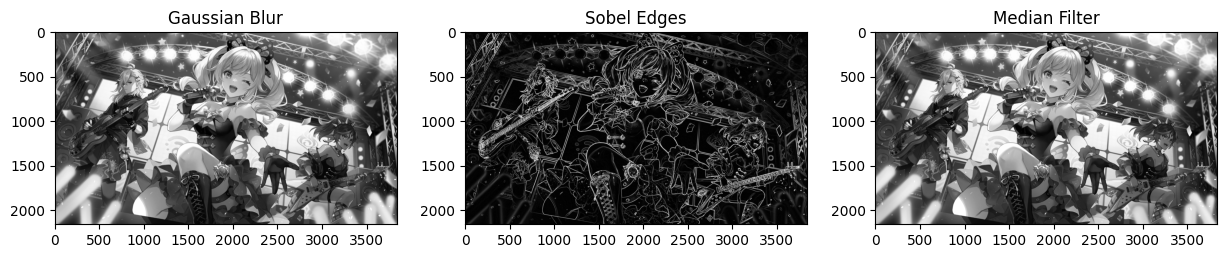

In [ ]:
# Aplicar filtros
blurred = gaussian_pure_python(image_list)
edges = sobel_pure_python(image_list)
denoised = median_pure_python(image_list)

# Convertir listas a imágenes PIL para visualizar
def list_to_image(data):
    img = Image.new("L", (len(data[0]), len(data)))
    for y in range(len(data)):
        for x in range(len(data[0])):
            img.putpixel((x, y), data[y][x])
    return img

# Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(list_to_image(blurred), cmap="gray")
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(list_to_image(edges), cmap="gray")
plt.title("Sobel Edges")

plt.subplot(1, 3, 3)
plt.imshow(list_to_image(denoised), cmap="gray")
plt.title("Median Filter")

plt.show()

In [ ]:
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Función para medir el rendimiento
def measure_performance(image, filter_func, name):
    # Medir tiempo
    start_time = time.time()
    result = filter_func(image)
    end_time = time.time()
    execution_time = end_time - start_time

    # Calcular FLOPS aproximados
    height = len(image)
    width = len(image[0])
    operations = 0

    if name == "Gaussian":
        # 9 multiplicaciones y 8 sumas por píxel, más normalización
        operations = height * width * (9 + 8 + 1)
    elif name == "Sobel":
        # 6 multiplicaciones y 6 sumas por dirección, más cálculo de magnitud
        operations = height * width * (6 + 6 + 6 + 2)
    elif name == "Median":
        # Ordenamiento de 9 elementos (aproximadamente 9*log(9) operaciones)
        operations = height * width * 9 * 3.17  # log2(9) ≈ 3.17

    flops = operations / execution_time

    return {
        "name": name,
        "time": execution_time,
        "operations": operations,
        "flops": flops
    }

# Aplicar filtros y medir rendimiento
gaussian_perf = measure_performance(image_list, gaussian_pure_python, "Gaussian")
sobel_perf = measure_performance(image_list, sobel_pure_python, "Sobel")
median_perf = measure_performance(image_list, median_pure_python, "Median")

# Recopilar resultados
performance_data = [gaussian_perf, sobel_perf, median_perf]

# Crear visualización con Plotly
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Tiempo de Ejecución (s)", "Rendimiento (FLOPS)")
)

# Gráfica de tiempo de ejecución
fig.add_trace(
    go.Bar(
        x=[p["name"] for p in performance_data],
        y=[p["time"] for p in performance_data],
        text=[f"{p['time']:.4f}s" for p in performance_data],
        textposition='auto',
        marker_color=['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(128, 0, 128, 0.8)'],
        name="Tiempo"
    ),
    row=1, col=1
)

# Gráfica de FLOPS
fig.add_trace(
    go.Bar(
        x=[p["name"] for p in performance_data],
        y=[p["flops"] for p in performance_data],
        text=[f"{p['flops']/1e6:.2f}M" for p in performance_data],
        textposition='auto',
        marker_color=['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(128, 0, 128, 0.8)'],
        name="FLOPS"
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Métricas de Rendimiento de Filtros de Imagen",
    showlegend=False,
    template="plotly_dark",
    height=500,
    width=900,
    font=dict(family="Arial", size=12),
)

fig.update_yaxes(title_text="Segundos", row=1, col=1)
fig.update_yaxes(title_text="Operaciones/segundo", row=1, col=2)

# Mostrar gráfica
fig.show()


for p in performance_data:
    print(f"{p['name']} - Tiempo: {p['time']:.4f}s, FLOPS: {p['flops']/1e6:.2f}M")

Gaussian - Tiempo: 14.1771s, FLOPS: 10.53M
Sobel - Tiempo: 25.2471s, FLOPS: 6.57M
Median - Tiempo: 14.4750s, FLOPS: 16.35M


Ahora con numpy

In [ ]:
image_array = np.array(gray_image)


In [ ]:
# Versiones NumPy optimizadas
def gaussian_numpy(image_array):
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
    from scipy.ndimage import convolve
    return convolve(image_array, kernel, mode='reflect').astype(np.uint8)

def sobel_numpy(image_array):
    from scipy.ndimage import convolve
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    grad_x = convolve(image_array, kernel_x, mode='reflect')
    grad_y = convolve(image_array, kernel_y, mode='reflect')

    magnitude = np.abs(grad_x) + np.abs(grad_y)
    return np.clip(magnitude, 0, 255).astype(np.uint8)

def median_numpy(image_array):
    from scipy.ndimage import median_filter
    return median_filter(image_array, size=3, mode='reflect').astype(np.uint8)

In [ ]:
# Función para medir el rendimiento
def measure_performance(image, filter_func, name, is_numpy=False):
    # Medir tiempo
    start_time = time.time()
    result = filter_func(image)
    end_time = time.time()
    execution_time = end_time - start_time

    # Calcular FLOPS aproximados
    if is_numpy:
        height, width = image.shape
    else:
        height = len(image)
        width = len(image[0])

    operations = 0
    if name == "Gaussian":
        # 9 multiplicaciones y 8 sumas por píxel, más normalización
        operations = height * width * (9 + 8 + 1)
    elif name == "Sobel":
        # 6 multiplicaciones y 6 sumas por dirección, más cálculo de magnitud
        operations = height * width * (6 + 6 + 6 + 2)
    elif name == "Median":
        # Ordenamiento de 9 elementos (aproximadamente 9*log(9) operaciones)
        operations = height * width * 9 * 3.17  # log2(9) ≈ 3.17

    flops = operations / execution_time

    return {
        "name": name,
        "time": execution_time,
        "operations": operations,
        "flops": flops,
        "result": result
    }

# Medir rendimiento para ambos conjuntos de funciones
python_perf = [
    measure_performance(image_list, gaussian_pure_python, "Gaussian"),
    measure_performance(image_list, sobel_pure_python, "Sobel"),
    measure_performance(image_list, median_pure_python, "Median")
]

numpy_perf = [
    measure_performance(image_array, gaussian_numpy, "Gaussian", True),
    measure_performance(image_array, sobel_numpy, "Sobel", True),
    measure_performance(image_array, median_numpy, "Median", True)
]

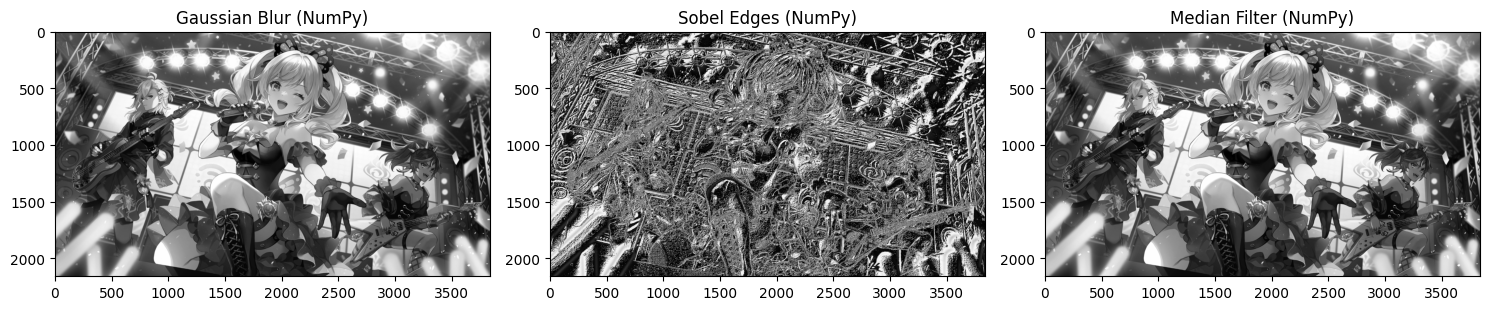

Resultados de rendimiento:
Gaussian:
  Python: 14.0918s, 10.59 MFLOPS
  NumPy:  0.3417s, 436.94 MFLOPS
  Aceleración: 41.24x

Sobel:
  Python: 25.7617s, 6.44 MFLOPS
  NumPy:  0.3064s, 541.42 MFLOPS
  Aceleración: 84.08x

Median:
  Python: 13.7610s, 17.20 MFLOPS
  NumPy:  0.9638s, 245.52 MFLOPS
  Aceleración: 14.28x



In [ ]:
# Función para convertir resultado a imagen
def to_image(data):
    if isinstance(data, list):  # Python puro (lista de listas)
        img = Image.new("L", (len(data[0]), len(data)))
        for y in range(len(data)):
            for x in range(len(data[0])):
                img.putpixel((x, y), data[y][x])
        return img
    else:  # NumPy array
        return Image.fromarray(data)

# Mostrar resultados de NumPy
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(to_image(numpy_perf[0]["result"]), cmap="gray")
plt.title("Gaussian Blur (NumPy)")

plt.subplot(1, 3, 2)
plt.imshow(to_image(numpy_perf[1]["result"]), cmap="gray")
plt.title("Sobel Edges (NumPy)")

plt.subplot(1, 3, 3)
plt.imshow(to_image(numpy_perf[2]["result"]), cmap="gray")
plt.title("Median Filter (NumPy)")
plt.tight_layout()
plt.show()

# Crear datos para la visualización
filter_names = ["Gaussian", "Sobel", "Median"]
implementations = ["Python", "NumPy"]

# Preparar datos para la gráfica
execution_times = []
flops_values = []
speedup_values = []

for i in range(3):  # Para cada filtro
    python_time = python_perf[i]["time"]
    numpy_time = numpy_perf[i]["time"]

    execution_times.append([python_time, numpy_time])
    flops_values.append([python_perf[i]["flops"]/1e6, numpy_perf[i]["flops"]/1e6])
    speedup_values.append(python_time / numpy_time)

# Crear visualización con Plotly
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Tiempo de Ejecución (s)", "Rendimiento (MFLOPS)", "Aceleración (×)")
)

colors = ['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(128, 0, 128, 0.8)']

# Gráfica de tiempo
for i, filter_name in enumerate(filter_names):
    fig.add_trace(
        go.Bar(
            x=implementations,
            y=execution_times[i],
            text=[f"{t:.4f}s" for t in execution_times[i]],
            textposition='auto',
            marker_color=[colors[i], colors[i]],
            name=filter_name
        ),
        row=1, col=1
    )

# Gráfica de FLOPS
for i, filter_name in enumerate(filter_names):
    fig.add_trace(
        go.Bar(
            x=implementations,
            y=flops_values[i],
            text=[f"{f:.2f}M" for f in flops_values[i]],
            textposition='auto',
            marker_color=[colors[i], colors[i]],
            name=filter_name
        ),
        row=1, col=2
    )

# Gráfica de aceleración
fig.add_trace(
    go.Bar(
        x=filter_names,
        y=speedup_values,
        text=[f"{s:.1f}×" for s in speedup_values],
        textposition='auto',
        marker_color=colors,
        name="Aceleración NumPy vs Python"
    ),
    row=1, col=3
)

# Personalizar diseño
fig.update_layout(
    title_text="Comparación de Rendimiento: Python Puro vs NumPy",
    template="plotly_dark",
    height=500,
    width=1200,
    font=dict(family="Arial", size=12),
)

fig.update_xaxes(title_text="Implementación", row=1, col=1)
fig.update_xaxes(title_text="Implementación", row=1, col=2)
fig.update_xaxes(title_text="Filtro", row=1, col=3)

fig.update_yaxes(title_text="Segundos (menos es mejor)", row=1, col=1)
fig.update_yaxes(title_text="MFLOPS (más es mejor)", row=1, col=2)
fig.update_yaxes(title_text="Factor de aceleración", row=1, col=3)

# Mostrar gráfica
fig.show()

# Imprimir resultados numéricos
print("Resultados de rendimiento:")
print("==========================")
for i, filter_name in enumerate(filter_names):
    py_time = python_perf[i]["time"]
    np_time = numpy_perf[i]["time"]
    speedup = py_time / np_time

    print(f"{filter_name}:")
    print(f"  Python: {py_time:.4f}s, {python_perf[i]['flops']/1e6:.2f} MFLOPS")
    print(f"  NumPy:  {np_time:.4f}s, {numpy_perf[i]['flops']/1e6:.2f} MFLOPS")
    print(f"  Aceleración: {speedup:.2f}x")
    print()

Now with cython

In [ ]:
%%writefile cythonimplement.pyx
import numpy as np
cimport numpy as np
from scipy.ndimage import convolve
from scipy.ndimage import median_filter
cimport cython
from PIL import Image

@cython.boundscheck(False)
@cython.wraparound(False)
def gaussian_cython(np.ndarray[np.uint8_t, ndim=2] image_array):
    cdef np.ndarray[np.float64_t, ndim=2] kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float64) / 16.0
    cdef np.ndarray[np.uint8_t, ndim=2] result = convolve(image_array, kernel, mode='reflect')
    return result

@cython.boundscheck(False)
@cython.wraparound(False)
def sobel_cython(np.ndarray[np.uint8_t, ndim=2] image_array):
    cdef int height = image_array.shape[0]
    cdef int width = image_array.shape[1]

    cdef np.ndarray[np.int32_t, ndim=2] kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int32)
    cdef np.ndarray[np.int32_t, ndim=2] kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.int32)

    # Properly allocate an empty int32 array with shape (height, width)
    cdef np.ndarray[np.int32_t, ndim=2] image_int32 = np.empty((height, width), dtype=np.int32)

    # Copy values from uint8 image to int32 image
    np.copyto(image_int32, image_array)

    cdef np.ndarray[np.int32_t, ndim=2] grad_x = convolve(image_int32, kernel_x, mode='reflect')
    cdef np.ndarray[np.int32_t, ndim=2] grad_y = convolve(image_int32, kernel_y, mode='reflect')

    cdef np.ndarray[np.uint8_t, ndim=2] magnitude = np.clip(np.abs(grad_x) + np.abs(grad_y), 0, 255).astype(np.uint8)

    return magnitude

@cython.boundscheck(False)
@cython.wraparound(False)
def median_cython(np.ndarray[np.uint8_t, ndim=2] image_array):
    cdef np.ndarray[np.uint8_t, ndim=2] result = median_filter(image_array, size=3, mode='reflect')
    return result

@cython.boundscheck(False)
@cython.wraparound(False)
def to_image_cython(np.ndarray[np.uint8_t, ndim=2] data):
    """
    Convierte un array NumPy a una imagen PIL utilizando Cython.

    Parameters:
    data (np.ndarray): Array NumPy con datos de imagen (valores de 0-255)

    Returns:
    PIL.Image: Imagen PIL resultante
    """
    return Image.fromarray(data)

Writing cythonimplement.pyx


In [ ]:
%%writefile setup.py
from setuptools import setup
from Cython.Build import cythonize
import numpy as np

setup(
    ext_modules=cythonize("cythonimplement.pyx"),
    include_dirs=[np.get_include()]
)

Writing setup.py


In [ ]:
!python setup.py build_ext --inplace

Compiling cythonimplement.pyx because it changed.
[1/1] Cythonizing cythonimplement.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/cythonimplement.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'cythonimplement' extension
creating build/temp.linux-x86_64-cpython-311
x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/core/include -I/usr/include/python3.11 -c cythonimplement.c -o build/temp.linux-x86_64-cpython-311/cythonimplement.o
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
  

In [ ]:
from cythonimplement import gaussian_cython, sobel_cython, median_cython
gaussian_cython(image_array)
sobel_cython(image_array)
median_cython(image_array)


array([[ 93,  93,  92, ..., 117, 117, 117],
       [ 92,  92,  92, ..., 117, 117, 117],
       [ 91,  91,  91, ..., 117, 117, 117],
       ...,
       [190, 190, 190, ..., 145, 140, 137],
       [190, 190, 190, ..., 147, 142, 140],
       [190, 190, 190, ..., 148, 144, 142]], dtype=uint8)

Comparando

In [ ]:
from cythonimplement import gaussian_cython, sobel_cython, median_cython, to_image_cython
# Función para medir el rendimiento
def measure_performance(image, filter_func, name, is_numpy=False):
    # Medir tiempo
    start_time = time.time()
    result = filter_func(image)
    end_time = time.time()
    execution_time = end_time - start_time
    # Calcular FLOPS aproximados
    if is_numpy:
        height, width = image.shape
    else:
        height = len(image)
        width = len(image[0])
    operations = 0
    if name == "Gaussian":
        # 9 multiplicaciones y 8 sumas por píxel, más normalización
        operations = height * width * (9 + 8 + 1)
    elif name == "Sobel":
        # 6 multiplicaciones y 6 sumas por dirección, más cálculo de magnitud
        operations = height * width * (6 + 6 + 6 + 2)
    elif name == "Median":
        # Ordenamiento de 9 elementos (aproximadamente 9*log(9) operaciones)
        operations = height * width * 9 * 3.17  # log2(9) ≈ 3.17
    flops = operations / execution_time
    return {
        "name": name,
        "time": execution_time,
        "operations": operations,
        "flops": flops,
        "result": result
    }
# Medir rendimiento para ambos conjuntos de funciones
python_perf = [
    measure_performance(image_list, gaussian_pure_python, "Gaussian"),
    measure_performance(image_list, sobel_pure_python, "Sobel"),
    measure_performance(image_list, median_pure_python, "Median")
]
numpy_perf = [
    measure_performance(image_array, gaussian_numpy, "Gaussian", True),
    measure_performance(image_array, sobel_numpy, "Sobel", True),
    measure_performance(image_array, median_numpy, "Median", True)
]
numpy_cython_perf = [
    measure_performance(image_array, gaussian_cython, "Gaussian", True),
    measure_performance(image_array, sobel_cython, "Sobel", True),
    measure_performance(image_array, median_cython, "Median", True)
]

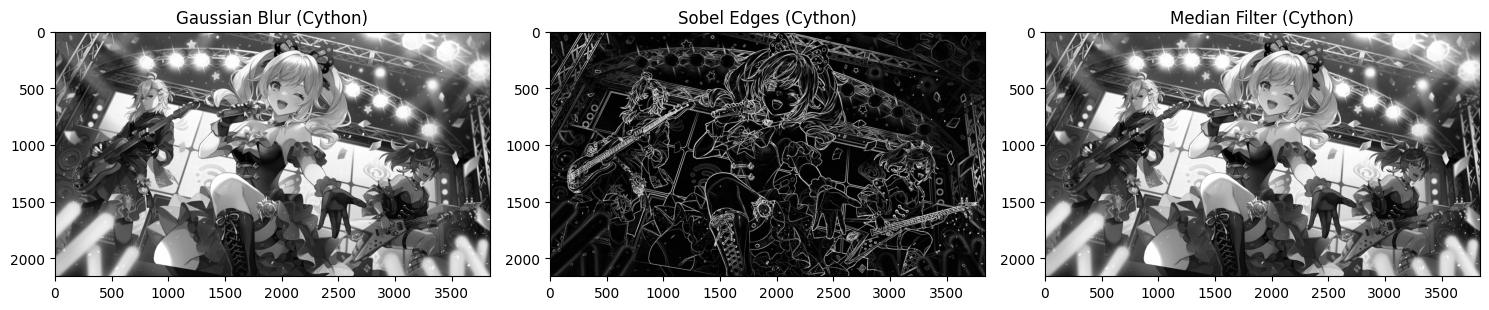

Resultados de rendimiento:
Gaussian:
  Python: 14.1022s, 10.59 MFLOPS
  NumPy:  0.1528s, 976.96 MFLOPS
  Cython: 0.2451s, 609.17 MFLOPS
  Aceleración: 0.62x

Sobel:
  Python: 25.9574s, 6.39 MFLOPS
  NumPy:  0.3274s, 506.64 MFLOPS
  Cython: 0.4175s, 397.38 MFLOPS
  Aceleración: 0.78x

Median:
  Python: 15.2226s, 15.55 MFLOPS
  NumPy:  1.2337s, 191.81 MFLOPS
  Cython: 1.1922s, 198.49 MFLOPS
  Aceleración: 1.03x



In [ ]:
# Función para convertir resultado a imagen
def to_image(data):
    if isinstance(data, list):  # Python puro (lista de listas)
        img = Image.new("L", (len(data[0]), len(data)))
        for y in range(len(data)):
            for x in range(len(data[0])):
                img.putpixel((x, y), data[y][x])
        return img
    else:  # NumPy array
        return Image.fromarray(data)

# Mostrar resultados de NumPy
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(to_image(numpy_cython_perf[0]["result"]), cmap="gray")
plt.title("Gaussian Blur (Cython)")

plt.subplot(1, 3, 2)
plt.imshow(to_image(numpy_cython_perf[1]["result"]), cmap="gray")
plt.title("Sobel Edges (Cython)")

plt.subplot(1, 3, 3)
plt.imshow(to_image(numpy_cython_perf[2]["result"]), cmap="gray")
plt.title("Median Filter (Cython)")
plt.tight_layout()
plt.show()

# Crear datos para la visualización
filter_names = ["Gaussian", "Sobel", "Median"]
implementations = ["Python", "NumPy", "Cython"]

# Preparar datos para la gráfica
execution_times = []
flops_values = []
speedup_values = []

for i in range(3):  # Para cada filtro
    python_time = python_perf[i]["time"]
    numpy_time = numpy_perf[i]["time"]
    cython_time = numpy_cython_perf[i]["time"]

    execution_times.append([python_time, numpy_time, cython_time])
    flops_values.append([python_perf[i]["flops"]/1e6, numpy_perf[i]["flops"]/1e6, numpy_cython_perf[i]["flops"]/1e6])
    speedup_values.append(numpy_time / cython_time)

# Crear visualización con Plotly
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Tiempo de Ejecución (s)", "Rendimiento (MFLOPS)", "Aceleración (×)")
)

colors = ['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(128, 0, 128, 0.8)']

# Gráfica de tiempo
for i, filter_name in enumerate(filter_names):
    fig.add_trace(
        go.Bar(
            x=implementations,
            y=execution_times[i],
            text=[f"{t:.4f}s" for t in execution_times[i]],
            textposition='auto',
            marker_color=[colors[i], colors[i]],
            name=filter_name
        ),
        row=1, col=1
    )

# Gráfica de FLOPS
for i, filter_name in enumerate(filter_names):
    fig.add_trace(
        go.Bar(
            x=implementations,
            y=flops_values[i],
            text=[f"{f:.2f}M" for f in flops_values[i]],
            textposition='auto',
            marker_color=[colors[i], colors[i]],
            name=filter_name
        ),
        row=1, col=2
    )

# Gráfica de aceleración
fig.add_trace(
    go.Bar(
        x=filter_names,
        y=speedup_values,
        text=[f"{s:.1f}×" for s in speedup_values],
        textposition='auto',
        marker_color=colors,
        name="Aceleración Cython vs Numpy"
    ),
    row=1, col=3
)

# Personalizar diseño
fig.update_layout(
    title_text="Comparación de Rendimiento: Python Puro vs NumPy vs Cython",
    template="plotly_dark",
    height=500,
    width=1200,
    font=dict(family="Arial", size=12),
)

fig.update_xaxes(title_text="Implementación", row=1, col=1)
fig.update_xaxes(title_text="Implementación", row=1, col=2)
fig.update_xaxes(title_text="Filtro", row=1, col=3)

fig.update_yaxes(title_text="Segundos (menos es mejor)", row=1, col=1)
fig.update_yaxes(title_text="MFLOPS (más es mejor)", row=1, col=2)
fig.update_yaxes(title_text="Factor de aceleración", row=1, col=3)

# Mostrar gráfica
fig.show()

# Imprimir resultados numéricos
print("Resultados de rendimiento:")
print("==========================")
for i, filter_name in enumerate(filter_names):
    py_time = python_perf[i]["time"]
    np_time = numpy_perf[i]["time"]
    cy_time = numpy_cython_perf[i]["time"]
    speedup = np_time / cy_time

    print(f"{filter_name}:")
    print(f"  Python: {py_time:.4f}s, {python_perf[i]['flops']/1e6:.2f} MFLOPS")
    print(f"  NumPy:  {np_time:.4f}s, {numpy_perf[i]['flops']/1e6:.2f} MFLOPS")
    print(f"  Cython: {cy_time:.4f}s, {numpy_cython_perf[i]['flops']/1e6:.2f} MFLOPS")
    print(f"  Aceleración: {speedup:.2f}x")
    print()